
Object Detection From Saved Model (TensorFlow 2)
=====================================


In [1]:
import os
import time
import tensorflow as tf
print (tf.__version__)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2.3.0


In [2]:
IMAGE_PATHS = ['object_detection\\test_images\\image1.jpg',
               'object_detection\\test_images\\image2.jpg',
              'object_detection\\test_images\\image3.jpg',
              'object_detection\\test_images\\image4.jpg',
              'object_detection\\test_images\\image5.jpg']

In [3]:
import cv2

cap = cv2.VideoCapture("object_detection/video/1.mp4")

In [4]:
IMAGE_PATHS

['object_detection\\test_images\\image1.jpg',
 'object_detection\\test_images\\image2.jpg',
 'object_detection\\test_images\\image3.jpg',
 'object_detection\\test_images\\image4.jpg',
 'object_detection\\test_images\\image5.jpg']

In [5]:
PATH_TO_LABELS='object_detection\\data\\mscoco_label_map.pbtxt'

In [6]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils


In [7]:
PATH_TO_SAVED_MODEL='object_detection\\models\\ssd_mobilenet_v2_coco_2018_03_29\\saved_model'

In [8]:
print('Loading model...', end='')
start_time = time.time()
print (start_time)

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
detect_fn = detect_fn.signatures['serving_default']

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...1609614165.2059584
Done! Took 18.83274531364441 seconds


Load label map data (for plotting)




In [9]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

In [10]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

Running inference for object_detection\test_images\image1.jpg...
Done

Running inference for object_detection\test_images\image2.jpg...
Done

Running inference for object_detection\test_images\image3.jpg...
Done

Running inference for object_detection\test_images\image4.jpg...
Done

Running inference for object_detection\test_images\image5.jpg...
Done



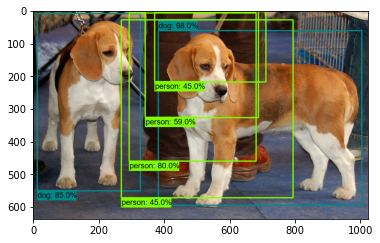

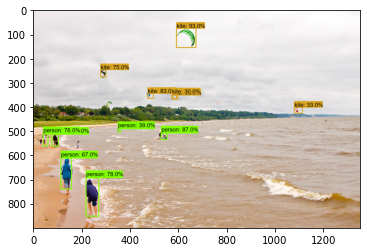

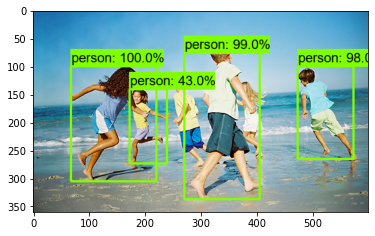

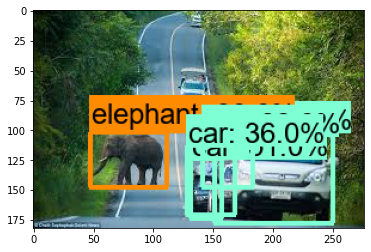

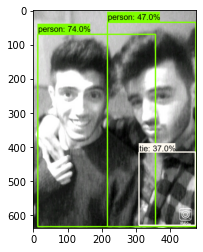

In [12]:
for image_path in IMAGE_PATHS:
    print(f'Running inference for {image_path}...')
    image_np = load_image_into_numpy_array(image_path)

    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)
     
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np,detections['detection_boxes'],detections['detection_classes'], detections['detection_scores'],
          category_index,use_normalized_coordinates=True,
          max_boxes_to_draw=200,min_score_thresh=.30,agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np)
    print('Done\n' )
plt.show()


In [13]:
os.listdir()

['.ipynb_checkpoints',
 'a3c_blogpost',
 'debug.log',
 'lstm_object_detection',
 'marco',
 'nst_blogpost',
 'object_detection',
 'Object_detection_saved_model_OK-YT - Video.ipynb',
 'Object_detection_saved_model_OK-YT.ipynb',
 'object_detection_saved_model_OK.ipynb',
 'pcl_rl',
 'README.md',
 'rebar',
 'sequence_projection',
 'setup.py',
 'slim',
 'vid2depth']

In [14]:
    
while 1:
    _,img = cap.read()
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    print(f'Running inference for {img}...')
    #image_np = load_image_into_numpy_array(image_path)

    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(img)

    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    print (detections.keys())

    num_detections = int(detections.pop('num_detections'))
    print ("Number of Objects in the image = ",num_detections)
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

    detections['num_detections'] = num_detections
    print ("Number of Objects in the image = ",num_detections)
    print (detections.items())
    print (detections.keys())
    print ("Classes in the image are : " ,detections['detection_classes'])

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    #image_np_with_detections = image_np.copy()
    #print (image_np_with_detections)


    ### VISUALIZATION ON THE IMAGE 
    final_img = viz_utils.visualize_boxes_and_labels_on_image_array(
          img,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)


    print('Done\n' )

    final_img = cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR)
    cv2.imshow('img',final_img)

    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


# sphinx_gallery_thumbnail_number = 2

Running inference for [[[208 103 119]
  [207 102 118]
  [203  97 109]
  ...
  [183  89 103]
  [186  91 107]
  [185  90 106]]

 [[210 105 121]
  [210 105 121]
  [208 102 114]
  ...
  [183  89 103]
  [186  91 107]
  [185  90 106]]

 [[210 111 120]
  [210 111 120]
  [214 112 120]
  ...
  [183  89 101]
  [186  92 104]
  [185  91 103]]

 ...

 [[191  74  96]
  [194  77  99]
  [195  80 101]
  ...
  [169  39  63]
  [163  31  54]
  [172  40  63]]

 [[186  70  85]
  [194  78  93]
  [195  81  95]
  ...
  [168  34  53]
  [169  35  53]
  [190  56  74]]

 [[184  68  83]
  [194  78  93]
  [195  81  95]
  ...
  [166  32  51]
  [175  41  59]
  [201  67  85]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  1
Number of Objects in the image =  1
dict_items([('detection_boxes', array([[0.00843391, 0.00842428, 0.9845083 , 0.9879928 ]], dtype=float32)), ('detection_scores', array([0.4837242], dtype=float32)), ('detection_classes

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  0
Number of Objects in the image =  0
dict_items([('detection_boxes', array([], shape=(0, 4), dtype=float32)), ('detection_scores', array([], dtype=float32)), ('detection_classes', array([], dtype=float32)), ('num_detections', 0)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  []
Done

Running inference for [[[205 134 113]
  [205 134 113]
  [207 133 110]
  ...
  [168  82  97]
  [167  79 109]
  [164  76 106]]

 [[205 134 113]
  [205 134 113]
  [206 132 109]
  ...
  [169  83  98]
  [166  78 108]
  [164  76 106]]

 [[205 134 116]
  [205 134 116]
  [205 131 111]
  ...
  [169  83  98]
  [166  78 108]
  [164  76 106]]

 ...

 [[162  67  93]
  [163  68  94]
  [166  70  99]
  ...
  [147  38  53]
  [157  48  65]
  [163  54  71]]

 [[162  65 100]
  [162  65 100]
  [163  66 101]
  ...
  [148  39  54]
  [

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  0
Number of Objects in the image =  0
dict_items([('detection_boxes', array([], shape=(0, 4), dtype=float32)), ('detection_scores', array([], dtype=float32)), ('detection_classes', array([], dtype=float32)), ('num_detections', 0)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  []
Done

Running inference for [[[211 127 128]
  [205 121 122]
  [194 110 111]
  ...
  [163  44  34]
  [163  43  38]
  [163  43  38]]

 [[211 127 128]
  [205 121 122]
  [194 110 111]
  ...
  [162  43  33]
  [163  43  38]
  [163  43  38]]

 [[207 123 124]
  [201 117 118]
  [193 109 110]
  ...
  [161  40  29]
  [161  42  34]
  [160  41  33]]

 ...

 [[187  94  90]
  [187  94  90]
  [187  94  90]
  ...
  [152  39  47]
  [154  40  51]
  [154  40  51]]

 [[187  94  90]
  [187  94  90]
  [187  94  90]
  ...
  [152  39  47]
  [

Number of Objects in the image =  0
dict_items([('detection_boxes', array([], shape=(0, 4), dtype=float32)), ('detection_scores', array([], dtype=float32)), ('detection_classes', array([], dtype=float32)), ('num_detections', 0)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  []
Done

Running inference for [[[144  33  53]
  [144  33  53]
  [144  33  53]
  ...
  [139  39   2]
  [139  40   0]
  [139  40   0]]

 [[143  32  52]
  [143  32  52]
  [143  32  52]
  ...
  [139  39   2]
  [139  40   0]
  [139  40   0]]

 [[144  30  51]
  [144  30  51]
  [144  30  51]
  ...
  [139  37  10]
  [139  39   2]
  [139  39   2]]

 ...

 [[143  29  43]
  [143  29  43]
  [143  29  43]
  ...
  [142  37  53]
  [149  44  60]
  [151  46  62]]

 [[143  29  43]
  [143  29  43]
  [143  29  43]
  ...
  [138  33  49]
  [155  50  66]
  [163  58  74]]

 [[143  29  43]
  [143  29  43]
  [143  29  43]
  ...
  [135  30  46]
  [158  53  69]
  [170  6

Number of Objects in the image =  2
dict_items([('detection_boxes', array([[8.1956387e-04, 2.4093568e-02, 9.9815369e-01, 7.7252239e-01],
       [3.8691276e-01, 6.5186244e-01, 9.2766839e-01, 9.6453732e-01]],
      dtype=float32)), ('detection_scores', array([0.5867312, 0.3761641], dtype=float32)), ('detection_classes', array([1., 1.], dtype=float32)), ('num_detections', 2)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1.]
Done

Running inference for [[[232 255 249]
  [232 255 249]
  [232 255 249]
  ...
  [178 247 240]
  [178 247 240]
  [178 247 240]]

 [[232 255 249]
  [232 255 249]
  [232 255 249]
  ...
  [178 247 240]
  [178 247 240]
  [178 247 240]]

 [[232 255 249]
  [232 255 249]
  [232 255 249]
  ...
  [178 247 240]
  [178 247 240]
  [178 247 240]]

 ...

 [[ 99 137 151]
  [ 99 137 151]
  [ 99 137 151]
  ...
  [ 73  89 100]
  [ 72  88  99]
  [ 72  88  99]]

 [[ 99 137 151]
  [ 97 135 149]
  [ 97 135 149]

Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.36790395, 0.04934029, 0.930614  , 0.37785786],
       [0.00632936, 0.25540328, 0.9948457 , 0.9226167 ],
       [0.45584545, 0.36539283, 0.6191536 , 0.43829152]], dtype=float32)), ('detection_scores', array([0.98601156, 0.77895594, 0.31841955], dtype=float32)), ('detection_classes', array([1., 1., 1.], dtype=float32)), ('num_detections', 3)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1.]
Done

Running inference for [[[201 251 247]
  [201 251 247]
  [200 252 249]
  ...
  [125 186 190]
  [125 186 190]
  [125 186 190]]

 [[201 251 247]
  [201 251 247]
  [200 252 249]
  ...
  [125 186 190]
  [125 186 190]
  [125 186 190]]

 [[201 251 247]
  [201 251 247]
  [200 252 249]
  ...
  [125 186 190]
  [125 186 190]
  [125 186 190]]

 ...

 [[ 51  95 105]
  [ 51  95 105]
  [ 52  97 104]
  ...
  [  9  42  47]
  [ 10  43  48]
  [ 10  43  48]]


Running inference for [[[200 252 247]
  [200 252 247]
  [199 253 249]
  ...
  [128 185 188]
  [128 185 188]
  [128 185 188]]

 [[200 252 247]
  [200 252 247]
  [199 253 249]
  ...
  [128 185 188]
  [128 185 188]
  [128 185 188]]

 [[200 252 247]
  [200 252 247]
  [199 253 249]
  ...
  [128 185 188]
  [128 185 188]
  [128 185 188]]

 ...

 [[ 51  91  98]
  [ 52  92  99]
  [ 51  91  98]
  ...
  [ 18  47  54]
  [ 20  49  56]
  [ 20  49  56]]

 [[ 50  90  97]
  [ 51  91  98]
  [ 51  91  98]
  ...
  [ 18  47  54]
  [ 19  48  55]
  [ 19  48  55]]

 [[ 50  90  97]
  [ 51  91  98]
  [ 51  91  98]
  ...
  [ 18  47  54]
  [ 19  48  55]
  [ 19  48  55]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  2
Number of Objects in the image =  2
dict_items([('detection_boxes', array([[0.36322722, 0.02501602, 0.9378929 , 0.37651533],
       [0.02350679, 0.2330623 , 0.9937942 , 0.93443024]], dtype=float32)), ('detection_scores'

Running inference for [[[200 252 247]
  [200 252 247]
  [200 252 247]
  ...
  [132 182 193]
  [132 182 193]
  [132 182 193]]

 [[200 252 247]
  [200 252 247]
  [200 252 247]
  ...
  [132 182 193]
  [132 182 193]
  [132 182 193]]

 [[200 252 247]
  [200 252 247]
  [200 252 247]
  ...
  [132 182 193]
  [132 182 193]
  [132 182 193]]

 ...

 [[ 59  98 107]
  [ 59  98 107]
  [ 59  98 107]
  ...
  [ 22  47  53]
  [ 25  50  56]
  [ 26  51  57]]

 [[ 59  98 107]
  [ 59  98 107]
  [ 59  98 107]
  ...
  [ 20  45  51]
  [ 22  47  53]
  [ 23  48  54]]

 [[ 58  97 106]
  [ 58  97 106]
  [ 58  97 106]
  ...
  [ 18  43  49]
  [ 21  46  52]
  [ 22  47  53]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  3
Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.36195526, 0.04742096, 0.93430114, 0.37343526],
       [0.05081934, 0.22086304, 0.99000317, 0.9298354 ],
       [0.333435  , 0.5897391 , 0.964

Done

Running inference for [[[203 254 247]
  [203 254 247]
  [203 254 247]
  ...
  [132 183 186]
  [132 183 186]
  [132 183 186]]

 [[203 254 247]
  [203 254 247]
  [203 254 247]
  ...
  [132 183 186]
  [132 183 186]
  [132 183 186]]

 [[205 254 247]
  [205 254 247]
  [205 254 247]
  ...
  [132 183 186]
  [132 183 186]
  [132 183 186]]

 ...

 [[ 64 101 105]
  [ 64 101 105]
  [ 63 100 104]
  ...
  [ 35  57  62]
  [ 35  57  62]
  [ 35  57  62]]

 [[ 64 101 105]
  [ 64 101 105]
  [ 63 100 104]
  ...
  [ 34  56  61]
  [ 34  56  61]
  [ 34  56  61]]

 [[ 64 101 105]
  [ 64 101 105]
  [ 63 100 104]
  ...
  [ 34  56  61]
  [ 34  56  61]
  [ 34  56  61]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  3
Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.3650558 , 0.0380637 , 0.90949893, 0.36407566],
       [0.05698732, 0.21408114, 1.        , 0.7454629 ],
       [0.31852606, 0.60432565,

Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.35629615, 0.05111675, 0.8968617 , 0.37125927],
       [0.07387528, 0.22515404, 0.9935796 , 0.78482294],
       [0.31632793, 0.6093954 , 0.9846029 , 0.9650005 ]], dtype=float32)), ('detection_scores', array([0.9916723 , 0.912125  , 0.78799057], dtype=float32)), ('detection_classes', array([1., 1., 1.], dtype=float32)), ('num_detections', 3)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1.]
Done

Running inference for [[[208 254 251]
  [208 254 251]
  [208 254 251]
  ...
  [137 178 179]
  [137 178 179]
  [137 178 179]]

 [[209 255 252]
  [209 255 252]
  [209 255 252]
  ...
  [137 178 179]
  [137 178 179]
  [137 178 179]]

 [[211 255 250]
  [211 255 250]
  [211 255 250]
  ...
  [137 178 179]
  [137 178 179]
  [137 178 179]]

 ...

 [[ 72 102 101]
  [ 72 102 101]
  [ 70 100  99]
  ...
  [ 45  57  62]
  [ 47  59  64]
  [ 47  59  64]]


Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.36195055, 0.02953354, 0.9398631 , 0.36992916],
       [0.07426596, 0.26019433, 0.98518157, 0.77582216],
       [0.32333577, 0.5888041 , 1.        , 0.96210325]], dtype=float32)), ('detection_scores', array([0.95292765, 0.90357494, 0.58582765], dtype=float32)), ('detection_classes', array([1., 1., 1.], dtype=float32)), ('num_detections', 3)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1.]
Done

Running inference for [[[207 255 254]
  [207 255 254]
  [207 255 254]
  ...
  [131 181 179]
  [131 181 179]
  [131 181 179]]

 [[207 255 254]
  [207 255 254]
  [207 255 254]
  ...
  [131 181 179]
  [131 181 179]
  [131 181 179]]

 [[207 255 251]
  [207 255 251]
  [207 255 251]
  ...
  [131 181 179]
  [131 181 179]
  [131 181 179]]

 ...

 [[ 72  97 101]
  [ 72  97 101]
  [ 72  97 101]
  ...
  [ 37  54  47]
  [ 37  54  49]
  [ 37  54  49]]


dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  3
Number of Objects in the image =  3
dict_items([('detection_boxes', array([[0.3605032 , 0.03397261, 0.9377291 , 0.37338656],
       [0.09634313, 0.2358855 , 0.9939146 , 0.78388476],
       [0.33401933, 0.64313936, 0.9420768 , 0.94548655]], dtype=float32)), ('detection_scores', array([0.98049825, 0.9148201 , 0.7560074 ], dtype=float32)), ('detection_classes', array([1., 1., 1.], dtype=float32)), ('num_detections', 3)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1.]
Done

Running inference for [[[214 255 248]
  [213 254 247]
  [213 255 245]
  ...
  [143 178 170]
  [143 178 170]
  [143 178 170]]

 [[214 255 248]
  [213 254 247]
  [213 255 245]
  ...
  [143 178 170]
  [143 178 170]
  [143 178 170]]

 [[214 255 246]
  [213 255 245]
  [213 255 245]
  ...
  [143 178 170]
  [143 178 170]
 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3599978 , 0.03616528, 0.9372266 , 0.38287657],
       [0.14349294, 0.23938763, 0.99440515, 0.7814803 ],
       [0.33130828, 0.6408821 , 0.9478464 , 0.9474923 ],
       [0.46632335, 0.36274135, 0.6323291 , 0.4420339 ]], dtype=float32)), ('detection_scores', array([0.9765341 , 0.911571  , 0.78922075, 0.5217093 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[210 255 247]
  [210 255 247]
  [210 255 247]
  ...
  [140 179 168]
  [140 179 168]
  [140 179 168]]

 [[211 255 248]
  [211 255 248]
  [211 255 248]
  ...
  [140 179 168]
  [140 179 168]
  [140 179 168]]

 [[211 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3628639 , 0.03728406, 0.93506575, 0.37418664],
       [0.1377357 , 0.24044332, 0.991282  , 0.78711617],
       [0.3223217 , 0.61048084, 0.9754767 , 0.94987553],
       [0.46652743, 0.36258534, 0.6329837 , 0.44458267]], dtype=float32)), ('detection_scores', array([0.97524613, 0.93781483, 0.85492396, 0.4732073 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[220 255 247]
  [220 255 247]
  [221 255 248]
  ...
  [145 173 166]
  [145 173 166]
  [145 173 166]]

 [[221 255 248]
  [221 255 248]
  [222 255 249]
  ...
  [145 173 166]
  [145 173 166]
  [145 173 166]]

 [[221 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.3623326 , 0.03113343, 0.93644345, 0.37504256],
       [0.15010306, 0.23557392, 0.9872695 , 0.78355193],
       [0.32160857, 0.6246356 , 0.9496498 , 0.9518194 ],
       [0.46257204, 0.36140102, 0.63414735, 0.44493544],
       [0.459279  , 0.35467535, 0.7182935 , 0.45489246]], dtype=float32)), ('detection_scores', array([0.98122954, 0.91825294, 0.865527  , 0.50054157, 0.3013078 ],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[217 255 249]
  [217 255 249]
  [217 255 249]
  ...
  [143 175 171]
  [144 176 172]
  [144 176 172]]

 [[218 255 250]
  [218 255 250]
 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3613147 , 0.03912573, 0.9390014 , 0.37326622],
       [0.3175233 , 0.6047195 , 0.956554  , 0.94512665],
       [0.1590738 , 0.23987752, 0.98510313, 0.7869732 ],
       [0.4676604 , 0.36290964, 0.63214207, 0.44490322]], dtype=float32)), ('detection_scores', array([0.9818207 , 0.9374286 , 0.9370918 , 0.56003857], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[219 255 250]
  [219 255 250]
  [219 255 250]
  ...
  [149 176 171]
  [148 175 170]
  [147 174 169]]

 [[219 255 250]
  [219 255 250]
  [219 255 250]
  ...
  [148 175 170]
  [148 175 170]
  [148 175 170]]

 [[219 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36324835, 0.0305662 , 0.9378718 , 0.37383193],
       [0.15640548, 0.23391363, 0.9851867 , 0.7878406 ],
       [0.32089376, 0.6073591 , 0.95260084, 0.9462047 ],
       [0.4643829 , 0.36130846, 0.6348796 , 0.44377124]], dtype=float32)), ('detection_scores', array([0.9855112 , 0.93101865, 0.8987435 , 0.53129613], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[228 255 250]
  [228 255 250]
  [227 255 250]
  ...
  [151 178 171]
  [151 178 171]
  [151 178 171]]

 [[228 255 250]
  [228 255 250]
  [227 255 250]
  ...
  [151 178 171]
  [151 178 171]
  [151 178 171]]

 [[228 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.3618936 , 0.03113116, 0.9348957 , 0.37021607],
       [0.31754512, 0.6116188 , 0.93622416, 0.94662803],
       [0.14496148, 0.23700076, 0.98756707, 0.794527  ],
       [0.46373105, 0.3614824 , 0.6378126 , 0.44334736],
       [0.45987362, 0.35245472, 0.7186108 , 0.45504892]], dtype=float32)), ('detection_scores', array([0.9741106 , 0.93484294, 0.92266226, 0.4959732 , 0.30728272],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[217 255 250]
  [217 255 250]
  [217 255 250]
  ...
  [142 179 169]
  [142 179 169]
  [142 179 169]]

 [[217 255 250]
  [217 255 250]
 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36489266, 0.02730687, 0.93848556, 0.37353867],
       [0.15721118, 0.2364237 , 0.986362  , 0.79415524],
       [0.32680467, 0.62696934, 0.94059277, 0.9463167 ],
       [0.4675723 , 0.36268553, 0.63721776, 0.44220164]], dtype=float32)), ('detection_scores', array([0.97893757, 0.92694414, 0.9140341 , 0.45616797], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[225 255 252]
  [225 255 252]
  [225 255 252]
  ...
  [149 177 168]
  [149 177 168]
  [149 177 168]]

 [[225 255 252]
  [225 255 252]
  [225 255 252]
  ...
  [150 178 169]
  [150 178 169]
  [150 178 169]]

 [[226 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3602032 , 0.03224638, 0.9323351 , 0.3729281 ],
       [0.3178303 , 0.63057035, 0.9343531 , 0.94735795],
       [0.14677238, 0.23551467, 0.9898367 , 0.79178464],
       [0.46469608, 0.36257765, 0.63533974, 0.44220367]], dtype=float32)), ('detection_scores', array([0.9751118 , 0.9152926 , 0.90715086, 0.42634317], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[212 255 250]
  [212 255 250]
  [212 255 250]
  ...
  [141 180 169]
  [141 180 169]
  [141 180 169]]

 [[212 255 250]
  [212 255 250]
  [212 255 250]
  ...
  [141 180 169]
  [141 180 169]
  [141 180 169]]

 [[212 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.3604275 , 0.03685071, 0.93031085, 0.37172818],
       [0.33056194, 0.6101031 , 0.9335844 , 0.9463987 ],
       [0.14966258, 0.23171699, 0.98746777, 0.78958535],
       [0.46671033, 0.36273032, 0.6393944 , 0.44275796],
       [0.46164238, 0.35598207, 0.7200326 , 0.45538318]], dtype=float32)), ('detection_scores', array([0.9861486 , 0.9177912 , 0.89863735, 0.4763534 , 0.3011775 ],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[218 255 251]
  [217 255 250]
  [217 255 250]
  ...
  [142 178 175]
  [142 178 175]
  [142 178 175]]

 [[218 255 251]
  [217 255 250]
 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3579999 , 0.03171901, 0.9368671 , 0.3741969 ],
       [0.3290677 , 0.6356068 , 0.9245262 , 0.94716567],
       [0.15198627, 0.23354316, 0.98875535, 0.7864984 ],
       [0.4658443 , 0.3626998 , 0.63525796, 0.44222605]], dtype=float32)), ('detection_scores', array([0.9854264, 0.9304844, 0.915561 , 0.5659203], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[215 255 248]
  [215 255 248]
  [215 255 248]
  ...
  [145 181 178]
  [145 181 178]
  [145 181 178]]

 [[215 255 248]
  [215 255 248]
  [215 255 248]
  ...
  [145 181 178]
  [145 181 178]
  [145 181 178]]

 [[215 255 248]

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3630533 , 0.03783062, 0.9374434 , 0.3756844 ],
       [0.15399992, 0.23932311, 0.9916991 , 0.7827333 ],
       [0.33521524, 0.62877667, 0.9612992 , 0.95366955],
       [0.46619102, 0.36344138, 0.63857996, 0.44230285]], dtype=float32)), ('detection_scores', array([0.9662529 , 0.900675  , 0.8673668 , 0.51521456], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[218 255 251]
  [218 255 251]
  [217 255 250]
  ...
  [145 181 176]
  [147 181 176]
  [147 181 176]]

 [[218 255 251]
  [218 255 251]
  [217 255 250]
  ...
  [145 181 176]
  [147 181 176]
  [147 181 176]]

 [[218 255 

Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36205074, 0.0355275 , 0.93975914, 0.37877485],
       [0.15237787, 0.23810163, 0.9890164 , 0.78280723],
       [0.33755988, 0.6277932 , 0.9640332 , 0.95318186],
       [0.46616718, 0.364335  , 0.63524485, 0.44259268]], dtype=float32)), ('detection_scores', array([0.9749173 , 0.91388047, 0.86730194, 0.52445453], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[220 255 250]
  [220 255 250]
  [220 255 250]
  ...
  [145 181 176]
  [144 180 175]
  [144 180 175]]

 [[220 255 250]
  [220 255 250]
  [220 255 250]
  ...
  [145 181 176]
  [144 180 175]
  [144 180 175]]

 [[220 255 250]
  [220 255 250]
  [220 255 250]
  ...
  [145 181 176]
  [144 180 175]
  [144 180 175]

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.3634423 , 0.02556401, 0.93825924, 0.37693533],
       [0.16129595, 0.23799902, 0.9924051 , 0.7818422 ],
       [0.33600378, 0.6298641 , 0.9616773 , 0.94864583],
       [0.4653517 , 0.36294097, 0.63711834, 0.44295532],
       [0.46143192, 0.3548497 , 0.7157709 , 0.45344657]], dtype=float32)), ('detection_scores', array([0.976694  , 0.9305619 , 0.8604495 , 0.5520579 , 0.30783314],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[217 255 251]
  [217 255 251]
  [217 255 251]
  ...
  [144 181 173]
  [146 181 173]
  [146 181 173]]

 [[217 255 251]
  [217 255 251]
 

Running inference for [[[216 255 250]
  [216 255 250]
  [215 255 251]
  ...
  [143 182 171]
  [143 182 171]
  [143 182 171]]

 [[216 255 250]
  [217 255 251]
  [215 255 251]
  ...
  [143 182 171]
  [143 182 171]
  [143 182 171]]

 [[217 255 250]
  [218 255 251]
  [217 255 251]
  ...
  [143 182 171]
  [143 182 171]
  [143 182 171]]

 ...

 [[ 98 108 109]
  [ 98 108 109]
  [ 97 107 108]
  ...
  [ 72  69  61]
  [ 72  69  61]
  [ 72  69  61]]

 [[ 94 106 106]
  [ 94 106 106]
  [ 93 105 105]
  ...
  [ 74  68  61]
  [ 74  68  61]
  [ 74  68  61]]

 [[ 93 105 105]
  [ 93 105 105]
  [ 92 104 104]
  ...
  [ 74  68  61]
  [ 74  68  61]
  [ 74  68  61]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36068493, 0.03585614, 0.93724674, 0.37651318],
       [0.1545187 , 0.243868  , 0.9916203 , 0.78748024],
       [0.3486673 , 0.62964445, 0.965

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36266002, 0.03082672, 0.9398471 , 0.375785  ],
       [0.15453008, 0.2371588 , 0.99206626, 0.78578496],
       [0.35539857, 0.6280264 , 0.9670236 , 0.95837134],
       [0.4659206 , 0.36296687, 0.6387995 , 0.44261244]], dtype=float32)), ('detection_scores', array([0.97819334, 0.9156236 , 0.8993398 , 0.5334603 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[217 255 249]
  [217 255 249]
  [217 255 249]
  ...
  [144 180 175]
  [144 180 175]
  [144 180 175]]

 [[217 255 249]
  [217 255 249]
  [217 255 249]
  ...
  [144 180 175]
  [144 180 175]
  [144 180 175]]

 [[217 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3613173 , 0.03978184, 0.93407106, 0.37682748],
       [0.14699915, 0.24161375, 0.9902191 , 0.78082156],
       [0.3526623 , 0.62506896, 0.97662127, 0.94904023],
       [0.4675753 , 0.36426118, 0.6374104 , 0.44253072]], dtype=float32)), ('detection_scores', array([0.97995245, 0.902478  , 0.8717606 , 0.5771429 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[220 255 252]
  [220 255 252]
  [220 255 252]
  ...
  [141 179 165]
  [141 179 165]
  [141 179 165]]

 [[220 255 252]
  [220 255 252]
  [220 255 252]
  ...
  [142 180 166]
  [142 180 166]
  [142 180 166]]

 [[220 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36095977, 0.03564867, 0.93705046, 0.37608704],
       [0.35509032, 0.63120157, 0.9517996 , 0.94929224],
       [0.15622342, 0.24111304, 0.9905015 , 0.78449464],
       [0.46898422, 0.36456212, 0.640699  , 0.44283637]], dtype=float32)), ('detection_scores', array([0.9748595 , 0.9265162 , 0.90242493, 0.56563073], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[215 255 251]
  [215 255 251]
  [215 255 251]
  ...
  [141 178 168]
  [141 178 168]
  [141 178 168]]

 [[216 255 252]
  [216 255 252]
  [216 255 252]
  ...
  [141 178 168]
  [141 178 168]
  [141 178 168]]

 [[216 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.3599429 , 0.03389928, 0.93588245, 0.37424207],
       [0.35555714, 0.6257628 , 0.96124834, 0.955722  ],
       [0.15234345, 0.23929343, 0.9912905 , 0.7861644 ],
       [0.46874523, 0.36289737, 0.64077973, 0.44304898],
       [0.46442515, 0.35499346, 0.71130353, 0.45549995]], dtype=float32)), ('detection_scores', array([0.9847615 , 0.9111123 , 0.89891464, 0.5825692 , 0.31304252],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[217 255 250]
  [217 255 250]
  [217 255 250]
  ...
  [142 180 174]
  [142 180 174]
  [142 180 174]]

 [[217 255 250]
  [217 255 250]
 

Running inference for [[[222 255 252]
  [222 255 252]
  [222 255 252]
  ...
  [140 178 172]
  [140 178 172]
  [140 178 172]]

 [[222 255 252]
  [222 255 252]
  [222 255 252]
  ...
  [141 179 173]
  [141 179 173]
  [141 179 173]]

 [[222 255 252]
  [222 255 252]
  [222 255 252]
  ...
  [142 180 174]
  [142 180 174]
  [142 180 174]]

 ...

 [[ 94 109 113]
  [ 94 109 113]
  [ 94 109 111]
  ...
  [ 74  68  61]
  [ 74  68  61]
  [ 74  68  61]]

 [[ 96 108 113]
  [ 96 108 113]
  [ 95 107 110]
  ...
  [ 76  70  63]
  [ 76  70  63]
  [ 76  70  63]]

 [[ 96 108 113]
  [ 96 108 113]
  [ 95 107 110]
  ...
  [ 76  70  63]
  [ 77  71  64]
  [ 77  71  64]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.36309475, 0.04095174, 0.9340287 , 0.37832177],
       [0.3555882 , 0.62940574, 0.96413493, 0.9522867 ],
       [0.15641478, 0.23961934, 0.989

Running inference for [[[218 255 250]
  [218 255 250]
  [220 255 250]
  ...
  [145 182 174]
  [144 181 171]
  [143 180 170]]

 [[218 255 250]
  [218 255 250]
  [220 255 250]
  ...
  [145 182 174]
  [144 181 171]
  [143 180 170]]

 [[218 255 250]
  [218 255 250]
  [220 255 250]
  ...
  [145 182 174]
  [144 181 171]
  [143 180 170]]

 ...

 [[ 99 104 112]
  [ 99 104 112]
  [ 98 103 111]
  ...
  [ 74  73  64]
  [ 76  75  67]
  [ 76  75  67]]

 [[ 99 103 116]
  [ 99 103 116]
  [ 98 102 115]
  ...
  [ 73  72  63]
  [ 78  77  68]
  [ 80  79  70]]

 [[ 99 103 116]
  [ 99 103 116]
  [ 98 102 115]
  ...
  [ 72  71  62]
  [ 77  76  67]
  [ 80  79  70]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36169642, 0.0366689 , 0.9291763 , 0.37497234],
       [0.15492958, 0.23959738, 0.99523443, 0.78115076],
       [0.35814354, 0.6264965 , 0.966

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.35926777, 0.04005882, 0.93116206, 0.37008142],
       [0.36674604, 0.6176584 , 0.9594052 , 0.94580674],
       [0.15645093, 0.2376762 , 0.9920642 , 0.7782213 ],
       [0.4677222 , 0.3659802 , 0.6375331 , 0.4411909 ]], dtype=float32)), ('detection_scores', array([0.9754478 , 0.9241406 , 0.9149165 , 0.47127464], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[216 255 250]
  [216 255 250]
  [216 255 250]
  ...
  [146 183 175]
  [146 183 175]
  [146 183 175]]

 [[216 255 250]
  [216 255 250]
  [216 255 250]
  ...
  [146 183 175]
  [146 183 175]
  [146 183 175]]

 [[216 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36107445, 0.03547257, 0.9379389 , 0.37462026],
       [0.36207932, 0.62810457, 0.9643205 , 0.9455155 ],
       [0.152717  , 0.24035412, 0.9951676 , 0.79210764],
       [0.4683236 , 0.36578375, 0.6364856 , 0.44156253]], dtype=float32)), ('detection_scores', array([0.98180467, 0.92073387, 0.91176116, 0.5496866 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[217 255 248]
  [217 255 248]
  [217 255 248]
  ...
  [145 182 174]
  [145 182 174]
  [145 182 174]]

 [[217 255 248]
  [217 255 248]
  [217 255 248]
  ...
  [145 182 174]
  [145 182 174]
  [145 182 174]]

 [[217 255 

dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.36127836, 0.0330524 , 0.9358918 , 0.37365717],
       [0.3716022 , 0.6197783 , 0.944507  , 0.943604  ],
       [0.15518725, 0.23921624, 0.99212646, 0.7945448 ],
       [0.46939826, 0.36555952, 0.6398337 , 0.44235528],
       [0.46481875, 0.35497546, 0.723655  , 0.4543571 ]], dtype=float32)), ('detection_scores', array([0.9818945 , 0.94599736, 0.91154957, 0.4457024 , 0.3106889 ],
      dtype=float32)), ('detection_classes', array([1., 1., 1., 1., 1.], dtype=float32)), ('num_detections', 5)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1. 1.]
Done

Running inference for [[[217 255 248]
  [217 255 248]
  [217 255 248]
  ...
  [145 182 172]
  [145 182 172]
  [145 182 172]]

 [[217 255 248]
  [217 255 248]
 

Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.36138815, 0.03206789, 0.9364067 , 0.37305567],
       [0.15438646, 0.23665616, 0.9949029 , 0.7894319 ],
       [0.36808103, 0.6347402 , 0.9635733 , 0.94602245],
       [0.467445  , 0.36499596, 0.64055467, 0.4425267 ]], dtype=float32)), ('detection_scores', array([0.97330695, 0.896185  , 0.87806886, 0.5093945 ], dtype=float32)), ('detection_classes', array([1., 1., 1., 1.], dtype=float32)), ('num_detections', 4)])
dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections'])
Classes in the image are :  [1. 1. 1. 1.]
Done

Running inference for [[[222 255 254]
  [222 255 254]
  [221 255 253]
  ...
  [146 181 173]
  [146 181 173]
  [146 181 173]]

 [[222 255 254]
  [222 255 254]
  [221 255 253]
  ...
  [146 181 173]
  [146 181 173]
  [146 181 173]]

 [[222 255 254]
  [222 255 254]
  [221 255 253]
  ...
  [146 181 173]
  [146 181 173]
  [146 181 173]]

 ...

 [[ 99 109 108]
  [ 99 109 

Running inference for [[[218 255 250]
  [218 255 250]
  [218 255 250]
  ...
  [144 184 171]
  [144 184 171]
  [144 184 171]]

 [[218 255 250]
  [218 255 250]
  [218 255 250]
  ...
  [144 184 171]
  [144 184 171]
  [144 184 171]]

 [[218 255 250]
  [218 255 250]
  [218 255 250]
  ...
  [144 184 171]
  [144 184 171]
  [144 184 171]]

 ...

 [[ 95 108 104]
  [ 95 108 104]
  [ 94 107 103]
  ...
  [ 71  70  51]
  [ 72  71  52]
  [ 73  72  53]]

 [[ 94 107 103]
  [ 94 107 103]
  [ 93 106 102]
  ...
  [ 71  70  51]
  [ 72  71  52]
  [ 72  71  52]]

 [[ 94 107 103]
  [ 94 107 103]
  [ 93 106 102]
  ...
  [ 71  70  51]
  [ 72  71  52]
  [ 72  71  52]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  4
Number of Objects in the image =  4
dict_items([('detection_boxes', array([[0.3628503 , 0.03352721, 0.9386605 , 0.37869698],
       [0.15064782, 0.23792824, 0.99370795, 0.78271914],
       [0.37825385, 0.62778974, 0.956

Running inference for [[[218 255 250]
  [218 255 250]
  [217 255 249]
  ...
  [144 180 175]
  [144 180 175]
  [144 180 175]]

 [[218 255 250]
  [218 255 250]
  [217 255 249]
  ...
  [144 180 175]
  [144 180 175]
  [144 180 175]]

 [[218 255 250]
  [218 255 250]
  [217 255 249]
  ...
  [145 181 176]
  [145 181 176]
  [145 181 176]]

 ...

 [[ 96 102 109]
  [ 98 104 111]
  [ 96 102 109]
  ...
  [ 73  71  58]
  [ 74  72  59]
  [ 74  72  59]]

 [[ 95 101 108]
  [ 97 103 110]
  [ 96 102 109]
  ...
  [ 72  70  59]
  [ 73  71  60]
  [ 74  72  61]]

 [[ 95 101 108]
  [ 97 103 110]
  [ 96 102 109]
  ...
  [ 72  70  59]
  [ 73  71  60]
  [ 74  72  61]]]...
dict_keys(['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes'])
Number of Objects in the image =  5
Number of Objects in the image =  5
dict_items([('detection_boxes', array([[0.36224636, 0.03506602, 0.9385849 , 0.3740325 ],
       [0.14796421, 0.23775321, 0.9985827 , 0.7851648 ],
       [0.3829099 , 0.6219834 , 0.959